In [1]:
ndvi_data = "../data/ndviavhrr19812001.nc"

In [3]:
import xarray as xr

In [34]:
#open a netcdf data set - global monthly ndvi data
ds = xr.open_dataset(ndvi_data)

In [35]:
# let's look at the variables in the data
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 252)
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Data variables:
    data     (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    history:     \nNational Aeronautics and Space Administration advanced ver...
    title:       NASA AVHRR normalized difference vegetation index, 1981-2001
    convention:  The file is written in COARDS-compliant netCDF:\nftp://ftp.u...

In [36]:
#ds is like a dataframe, but stacked for multiple datasets
ds.keys()

[u'lat', u'lon', u'time', u'data']

In [37]:
#in this dataset, "data" is the key that stores our data
ds['data']

<xarray.DataArray 'data' (time: 252, lat: 180, lon: 360)>
[16329600 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Attributes:
    units:      non-dimensional
    long_name:  NASA AVHRR normalized difference vegetation index, 1981-2001

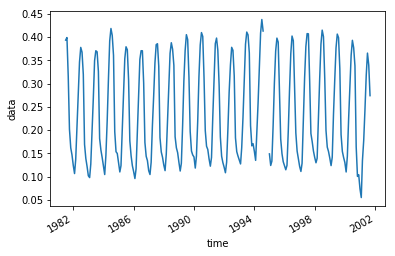

In [95]:
# let's see what the average NDVI looks like over time
%matplotlib inline
#.data because of the 'data' key
# this takes the average over the lat and lon
ds.data.mean(dim=["lat","lon"]).plot()

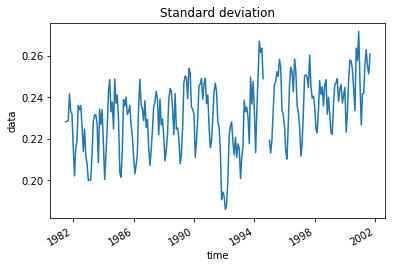

In [109]:
#can also do median
fig, ax = plt.subplots()
ds.data.std(dim=["lat","lon"]).plot(ax=ax)
ax.set_title("Standard deviation")

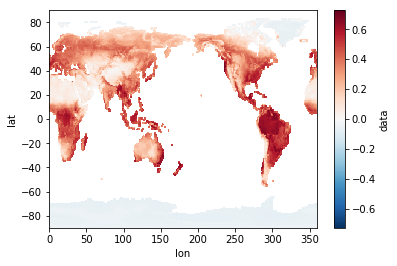

In [97]:
# can do maps too!
ds.data.mean(dim=["time"]).plot()

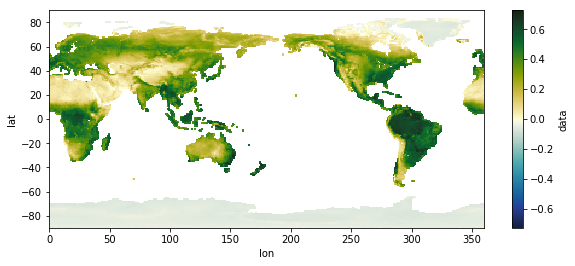

In [103]:
#let's use a more logical cmap and learn how to install things
import cmocean.cm as ccm
fig, ax = plt.subplots(figsize=(10,4))
ds.data.mean(dim=["time"]).plot(cmap=ccm.delta, ax=ax)
ax.set_aspect('equal')

# To do
Try some other statistics like min, max, median, etc

In [38]:
#our time series data
ds['time']

<xarray.DataArray 'time' (time: 252)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Attributes:
    title:    Time

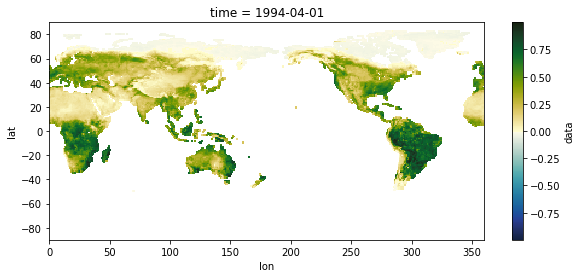

In [105]:
# let's pick a random date
fig, ax = plt.subplots(figsize=(10,4))
ds.data.loc['1994-04'].plot(cmap=ccm.delta, ax =ax)
ax.set_aspect('equal')

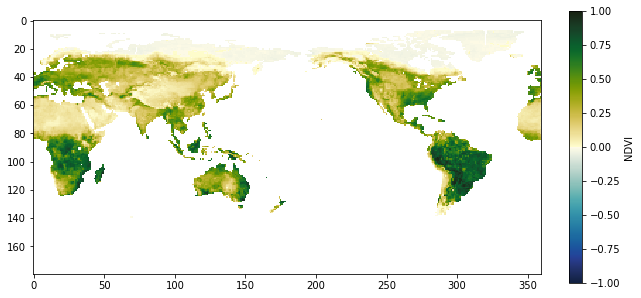

In [107]:
# more control?
#values converts ds to an array, #squeeze removes dimensions
ndvi = ds.data.loc['1994-04'].values.squeeze()

fig, ax = plt.subplots(figsize=(10,5))
#center at 0
im = ax.imshow(ndvi, cmap=ccm.delta, vmin=-1, vmax=1)
cb = fig.colorbar(im, fraction=.04)
cb.set_label("NDVI")

In [84]:
# Let's get ndvi data near new york city: 40.7128° N, -74.0059° W
# first we need to convert -74.0059 to a 0-360 grid
# formula is longitude modulo 360
-74.0059 % 360

285.9941

In [85]:
ts = ds.data.sel(lat=40.7128, lon=285.9941, method='nearest', tolerance=5)

/Users/hannah/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


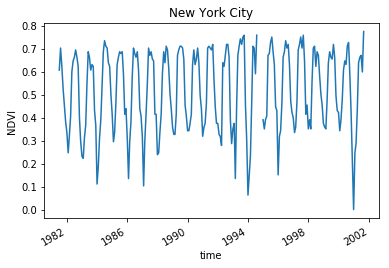

In [92]:
fig, ax = plt.subplots()
ts.plot(ax=ax)
ax.set(title="New York City", ylabel="NDVI")
fig.show()

# To Do
1. Pick another day to plot
2. Plot the time series closest to the capital city of the country you chose for your group project
3. Compute the standard deviation for the capital of your choice

In [142]:
# let's look at monthly averages 
clim = ds.groupby('time.month').mean('time')

In [143]:
clim

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, month: 12)
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 81.5 80.5 ...
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    data     (month, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...

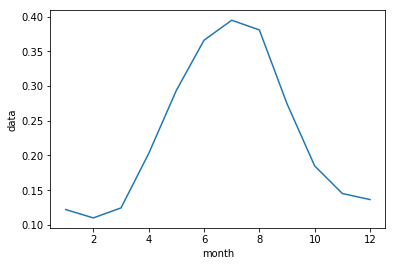

In [144]:
clim.data.mean(['lat','lon']).plot()

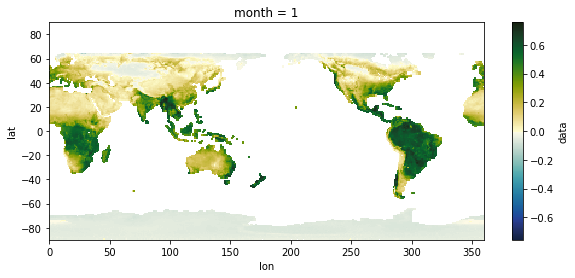

In [145]:
fig, ax = plt.subplots(figsize=(10,4))
clim.data.loc[1].plot(cmap=ccm.delta, ax=ax)
ax.set_aspect("equal")
ax.set_label("January NDVI")

# To Do
1. Plot the climatology NDVI for New York City
2. Plot the climatology NDVI for your capitol city
3. plot the average NDVI for 